In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
np.random.seed(83)
tf.random.set_seed(83)
random.seed(83)

In [4]:
data = pd.read_csv('data_stocks.csv')
data = data.drop(['DATE'], axis=1)

In [5]:
data['SP500'] = data['SP500'].shift(-1)
data = data.dropna(axis=0)

In [6]:
data_a = np.array(data)

In [7]:
n = data_a.shape[0]
train_end = int(np.floor(0.8 * n)) - 12
test_start = train_end
data_train = data_a[:train_end, :]
data_test = data_a[test_start:, :]

In [8]:
scaler = MinMaxScaler()
scaler.fit(data_train)
data_train_norm = scaler.transform(data_train)
data_test_norm = scaler.transform(data_test)

In [9]:

X_train = data_train_norm[:, 1:]
y_train = data_train_norm[:, 0]
X_test = data_test_norm[:, 1:]
y_test = data_test_norm[:, 0]

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error



In [12]:
model = Sequential([
    Dense(83, activation='relu', input_shape=(X_train.shape[1],)),  
    Dense(41, activation='relu'),                                   
    Dense(1)                                                        
])

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 83)             │        41,583 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 41)             │         3,444 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,069 (176.05 KB)

 Trainable params: 45,069 (176.05 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 5.5795e-04 - mae: 0.0143 - val_loss: 0.0106 - val_mae: 0.0873
Epoch 2/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2394e-04 - mae: 0.0086 - val_loss: 0.0078 - val_mae: 0.0770
Epoch 3/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.2770e-05 - mae: 0.0074 - val_loss: 0.0038 - val_mae: 0.0536
Epoch 4/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7.3061e-05 - mae: 0.0065 - val_loss: 0.0024 - val_mae: 0.0431
Epoch 5/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.5696e-05 - mae: 0.0062 - val_loss: 0.0018 - val_mae: 0.0373
Epoch 6/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.9686e-05 - mae: 0.0058 - val_loss: 0.0014 - val_mae: 0.0319
Epoch 7/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.5168e-05 - mae: 0.0056 - val_loss: 0.0010 - val_mae: 0.0264
Epoch 8/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.1587e-05 - mae: 0.0054 - val_loss: 6.6915e-04 - val_mae: 0.0207
Epoc

In [17]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae:.5f}")

259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Mean Absolute Error (MAE): 0.04244


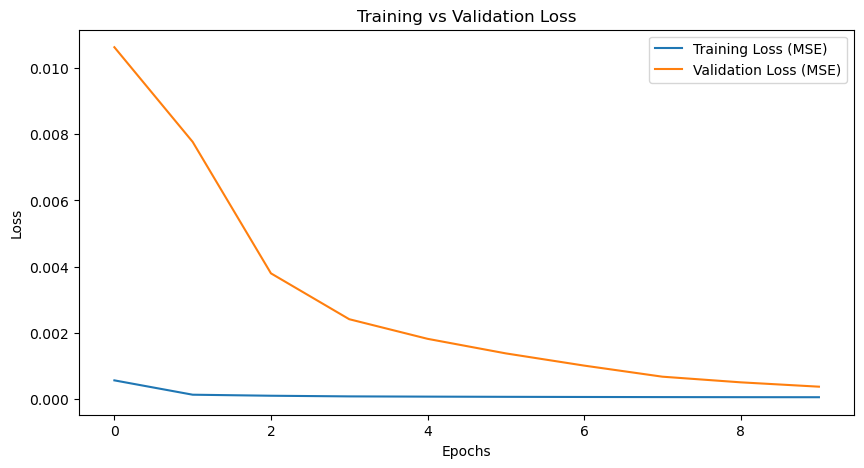

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [19]:
sp500_min_train = data_train[:, 0].min()
sp500_max_train = data_train[:, 0].max()
sp500_delta = sp500_max_train - sp500_min_train

In [20]:
n_rec = random.randint(0, X_test.shape[0] - 1)
predicted_price = y_pred[n_rec][0] * sp500_delta + sp500_min_train
actual_price = y_test[n_rec] * sp500_delta + sp500_min_train

In [21]:
print(f"\nSample Prediction (Record {n_rec}):")
print(f" Predicted Price: {predicted_price:.2f}")
print(f" Actual Price:    {actual_price:.2f}")
print(f" Absolute Error:  {abs(predicted_price - actual_price):.2f}")
print(f" % Error:         {abs(predicted_price - actual_price) / actual_price * 100:.2f}%")


Sample Prediction (Record 7535):
 Predicted Price: 2444.79
 Actual Price:    2449.17
 Absolute Error:  4.38
 % Error:         0.18%
